In [175]:
#Import Libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import seaborn as sns


stopwords.words('english')


import warnings
warnings.filterwarnings('ignore')


In [176]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [177]:
df.shape

(5572, 5)

In [178]:
# cheak null value
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Cleaning


In [179]:
# Drop Null Columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
# Rename Columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [181]:
# target columns Lable Encoding
labelencode = LabelEncoder()
df['target'] = labelencode.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
# cheak Duplicate and Drop

df.duplicated()
df.drop_duplicates(keep = "first" , inplace = True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [183]:
# 0 = Not Spam
# 1 = Spam
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

# Data Analysis

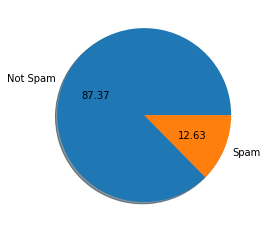

In [184]:
plt.pie(df['target'].value_counts(), labels=['Not Spam', 'Spam'] , autopct='%0.2f' , shadow=True)
plt.show()

# Data Perprocessing



1. Lower Case
2. Tokenization 
3. Remove spacial Character 
4. Remove Stopwords
5. Remove Punctuation
6. Stemming

In [185]:
ps = PorterStemmer()


In [1]:
def data_clening(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    x = []
    
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    z = []
    
    for i in x:
        z.append( ps.stem(i))
        
    
    return ' '.join(z)




In [187]:
df['text_transform'] = df['text'].apply(data_clening)

In [188]:
df.head()

,target,text,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [189]:
# Top 30 Spam Words
sp_word = []
for msg in df[df['target'] == 1]['text_transform'].tolist():
    for i in msg.split():
        sp_word.append(i)

In [190]:
from collections import Counter

df2 = pd.DataFrame(Counter(sp_word).most_common(30))
df2.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


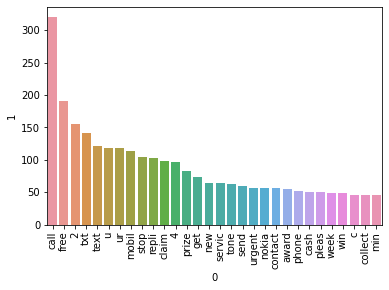

In [191]:
sns.barplot(df2[0], df2[1])


plt.xticks(rotation='vertical')

plt.show()

In [192]:
# Top 30 Ham Word
ham_word = []
for msg in df[df['target'] == 0]['text_transform'].tolist():
    for i in msg.split():
        ham_word.append(i)
        


In [193]:
df3 = pd.DataFrame(Counter(ham_word).most_common(30))
df3.head()


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


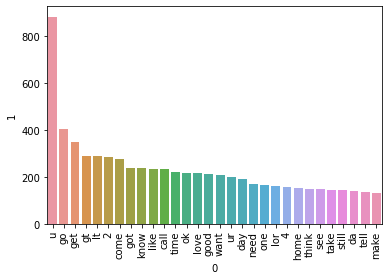

In [194]:
sns.barplot(df3[0], df3[1])


plt.xticks(rotation='vertical')

plt.show()

# Model Building

In [195]:
df.head()

,target,text,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


CountVectorizer

In [196]:
# to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [197]:
x = cv.fit_transform(df['text_transform']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [198]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [199]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2 )

In [200]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score #accuracy & precision is importent for spam sms detection


In [201]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()


In [202]:
# BernoulliNB Model
bnb.fit(x_train,y_train)
y_pre1 = bnb.predict(x_test)


print('Accuracy= ',accuracy_score(y_test ,y_pre1))
print('Precision Score= ', precision_score(y_test, y_pre1))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre1))



Accuracy=  0.9700193423597679
Precision Score=  0.9734513274336283
Confusion MAtrix=  
 [[893   3]
 [ 28 110]]


In [203]:
# GaussianNB Model
gnb.fit(x_train,y_train)
y_pre2 = gnb.predict(x_test)

print('Accuracy= ',accuracy_score(y_test ,y_pre2))
print('Precision Score= ', precision_score(y_test, y_pre2))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre2))


Accuracy=  0.8800773694390716
Precision Score=  0.5315315315315315
Confusion MAtrix=  
 [[792 104]
 [ 20 118]]


In [204]:
# MultinomialNB Model
mnb.fit(x_train, y_train)
y_pre3 = mnb.predict(x_test)

print('Accuracy= ',accuracy_score(y_test ,y_pre3))
print('Precision Score= ', precision_score(y_test, y_pre3))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre3))

Accuracy=  0.9642166344294004
Precision Score=  0.8344370860927153
Confusion MAtrix=  
 [[871  25]
 [ 12 126]]


TfidfVectorizer

In [205]:
# statistical formula to convert text documents into vectors based on the relevancy of the word
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)

In [206]:
x2 = tfid.fit_transform(df['text_transform']).toarray()

x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=2 )

In [207]:
# BernoulliNB Model
bnb.fit(x_train,y_train)
y_pre1 = bnb.predict(x_test)


print('Accuracy= ',accuracy_score(y_test ,y_pre1))
print('Precision Score= ', precision_score(y_test, y_pre1))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre1))


Accuracy=  0.9835589941972921
Precision Score=  0.991869918699187
Confusion MAtrix=  
 [[895   1]
 [ 16 122]]


In [208]:
# GaussianNB Model
gnb.fit(x_train,y_train)
y_pre2 = gnb.predict(x_test)

print('Accuracy= ',accuracy_score(y_test ,y_pre2))
print('Precision Score= ', precision_score(y_test, y_pre2))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre2))

Accuracy=  0.8694390715667312
Precision Score=  0.5068493150684932
Confusion MAtrix=  
 [[788 108]
 [ 27 111]]


In [218]:
# MultinomialNB Model
mnb.fit(x_train, y_train)
y_pre3 = mnb.predict(x_test)

print('Accuracy= ',accuracy_score(y_test ,y_pre3))
print('Precision Score= ', precision_score(y_test, y_pre3))
print('Confusion MAtrix= ','\n', confusion_matrix(y_test, y_pre3))

Accuracy=  0.9709864603481625
Precision Score=  1.0
Confusion MAtrix=  
 [[896   0]
 [ 30 108]]


In [210]:
# Different Type of Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [211]:
LR = LogisticRegression()
SVC = SVC()
MNB = MultinomialNB()
DTC = DecisionTreeClassifier(max_depth=5)
KNC = KNeighborsClassifier(n_neighbors=50)
RFC = RandomForestClassifier(n_estimators=50)
AdaBC = AdaBoostClassifier()
BC = BaggingClassifier(n_estimators=50)
ETC = ExtraTreesClassifier(n_estimators=50)
GBC = GradientBoostingClassifier(n_estimators=50)
XGB = XGBClassifier()



In [212]:
Clfs = {
    'LR' : LR,
    'SVC' : SVC,
    'MNB' : MNB,
    'DTC' : DTC,
    'KNC' : KNC,
    'RFC' : RFC,
    'AdaBC' : AdaBC,
    'BC' : BC,
    'ETC' : ETC,
    'GBC' : GBC,
    'XGB' : XGB
    
}

In [222]:
def train_mod(model, x_train, x_test, y_train, y_text):
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pre)
    precision = precision_score(y_test, y_pre)
    
    return accuracy, precision
    

In [220]:
train_mod(SVC, x_train, x_test, y_train, y_test)

(0.9729206963249516, 0.8115942028985508)

In [215]:
accuracies = []
precisions = []

for name, mod in Clfs.items():
    
    accu, prec = train_mod(mod,x_train, x_test, y_train, y_test)
    
    accuracies.append(accu)
    precisions.append(prec)
    
    

In [216]:
Model_Result = pd.DataFrame({'Algorithm' : Clfs.keys(), 'Accuracy': accuracies, 'Precision': precisions})
Model_Result.sort_values('Accuracy' and 'Precision', ascending=False)

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.847826
10,XGB,0.972921,0.847826
5,RFC,0.974855,0.818841
1,SVC,0.972921,0.811594
7,BC,0.956480,0.811594
2,MNB,0.970986,0.782609
6,AdaBC,0.961315,0.760870
0,LR,0.956480,0.688406
9,GBC,0.949710,0.673913
3,DTC,0.930368,0.615942


In [224]:
import pickle
pickle.dump(tfid, open('vectoriz.pkl', 'wb'))
pickle.dump(mnb, open('nodel.pkl', 'wb'))

In [226]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 064B-386F

 Directory of D:\Pythons Coures\0 Data Science\Project for Resume\SMS Spam Detection With Deploy

01-Nov-22  08:29 PM    <DIR>          .
01-Nov-22  08:29 PM    <DIR>          ..
31-Oct-22  11:04 PM    <DIR>          .ipynb_checkpoints
01-Nov-22  08:29 PM            96,584 nodel.pkl
01-Nov-22  08:29 PM            83,199 SMS Spam Detection.ipynb
20-Sep-19  02:54 AM           503,663 spam.csv
01-Nov-22  08:29 PM           169,695 vectoriz.pkl
               4 File(s)        853,141 bytes
               3 Dir(s)  116,685,058,048 bytes free
